# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [2]:
df = pd.read_csv(r'C:\Users\igbopa\Desktop\REPO TRABAJO\3-Machine_Learning\1-Supervisado\1-Regression\3-Regularization\ejercicios\data\Advertising.csv')
df = df.loc[:, "TV":]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


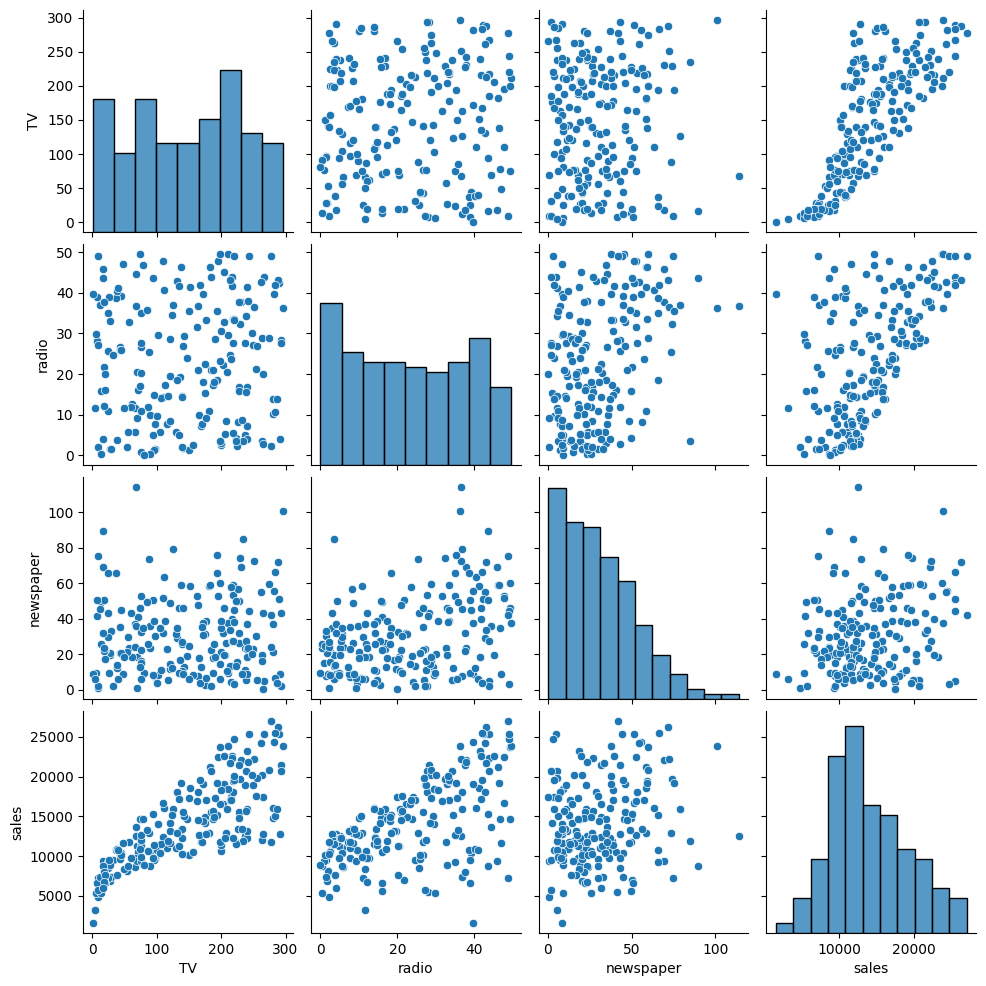

In [5]:
#pairplot
sns.pairplot(df)

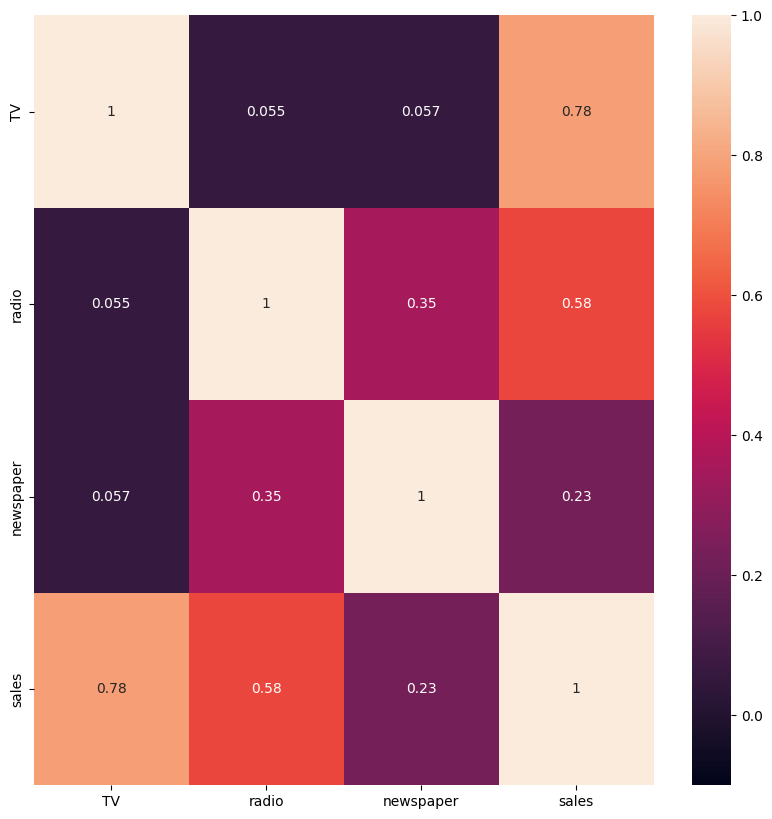

In [6]:
# HEATMAP BABY
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           vmin=-0.1,
           vmax=1,
           annot=True);

## Modelado

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [8]:
X = df[["TV", "radio", "newspaper"]]#tv, radio y newspaper
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df["sales"]
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [51]:
#Miramos los shape de cada test y train para ver si lo hemos hecho bien
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [12]:
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet as Rasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [39]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

baseline_error = metrics.mean_squared_error(y_test, y_pred)

In [14]:
#instancia y fit del modelo lineal


print('MAE test', mean_absolute_error(y_test, y_pred))
print('MSE test', mean_squared_error(y_test, y_pred))
print('MAPE test', mean_absolute_percentage_error(y_test, y_pred))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 1361.7813502090278
MSE test 4402118.291449683
MAPE test 0.24610850610005602
RMSE test 2098.12256349568


In [15]:
ridgeR = Ridge(alpha = 10) #**2 Cuadratica
ridgeR.fit(X_train, y_train)

y_pred_ridge = ridgeR.predict(X_test)

In [16]:
# instancia y fit del ridge

print('MAE test', mean_absolute_error(y_test, y_pred_ridge))
print('MSE test', mean_squared_error(y_test, y_pred_ridge))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

MAE test 1361.6785049651596
MSE test 4401206.978045514
RMSE test 2097.905378715998


In [17]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 
alphas

array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

In [19]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

errors = {}

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_) 
    
    y_pred = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [20]:
min(err_ridge)

4136464.860774398

In [21]:
err_ridge.index(min(err_ridge))

28

In [22]:
alphas[28]

7443.803013251689

In [23]:
# alpha buena
alphas[err_ridge.index(min(err_ridge))]

7443.803013251689

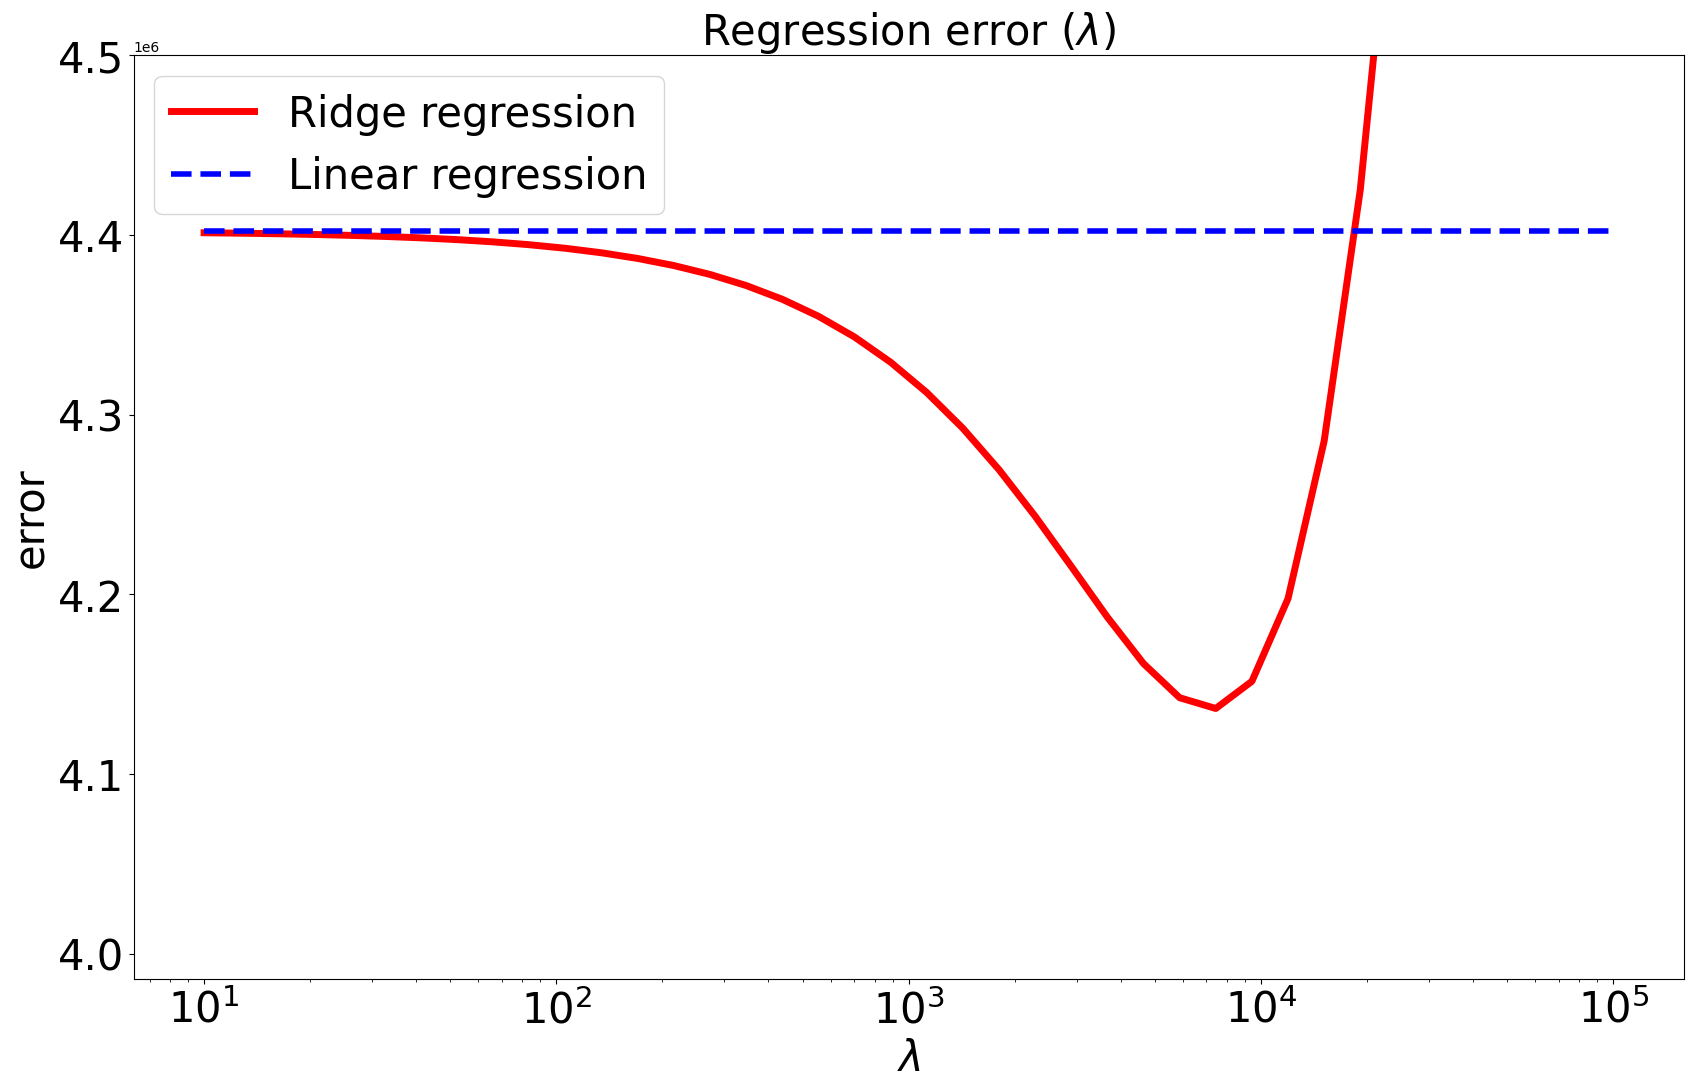

In [24]:
#Soms demasiado buenos y esta grafica os la dejamos.
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [38]:
ridgeR = Ridge(alpha = 7443.803013251689) #**2 Cuadratica
ridgeR.fit(X_train, y_train)

y_pred_ridge = ridgeR.predict(X_test)

In [26]:
# entrenar el Ridge con el mejor alpha, CUIDADO QUE IGUAL NO OS SALE IDENTICO!!!
print('MAE test', mean_absolute_error(y_test, y_pred_ridge))
print('MSE test', mean_squared_error(y_test, y_pred_ridge))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

MAE test 1356.5713026457631
MSE test 4136464.860774398
RMSE test 2033.8300963390225


In [27]:
mean_squared_error(y_test, y_pred_ridge)

4136464.860774398

In [28]:
# LIN_REG SCORE
lr.score(X_train, y_train)

0.9067114990146382

In [29]:
# RIDGE_SCORE
ridgeR.score(X_train, y_train)

0.8959327002053988

In [30]:
lassoR = Lasso(alpha = 10) 
lassoR.fit(X_train, y_train)

y_pred_lasso = lassoR.predict(X_test)

In [31]:
# REPETIMOS CON LASSO Y ALPHA=10

print('MAE test', mean_absolute_error(y_test, y_pred_lasso))
print('MSE test', mean_squared_error(y_test, y_pred_lasso))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

MAE test 1361.792507217947
MSE test 4401370.760781587
RMSE test 2097.9444131772384


In [40]:
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

In [41]:
min(err_lasso)

4218332.61046398

In [42]:
err_lasso.index(min(err_lasso))

91

In [35]:
alphas[err_lasso.index(min(err_lasso))]

5722.3676593502205

In [36]:
alphas[91]

5722.3676593502205

In [ ]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="lasso regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5722.3676593502205)


print('MAE test', mean_absolute_error(y_test, y_pred))
print('MSE test', mean_squared_error(y_test, y_pred))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE test 1350.8697707175315
MSE test 4310080.18191943
RMSE test 2076.0732602486432


In [45]:
rasso = Rasso(alpha = 1000, l1_ratio = 0.1)
rasso.fit(X_train, y_train)

y_pred_rasso = rasso.predict(X_test)

In [46]:
# elasrtnet alpha=1000, r = 0.1
print('MAE test', mean_absolute_error(y_test, y_pred_rasso))
print('MSE test', mean_squared_error(y_test, y_pred_rasso))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred_rasso)))

MAE test 2218.88132608109
MSE test 8083355.919689265
RMSE test 2843.1243236427886


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
#from sklearn.model_selection import GridSearchCV

#elastic = Rasso()

#parameters = {'alpha': np.logspace(0,2,20),
#               'l1_ratio': np.arange(0,1,0.1)
#             }

#elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)

#elastic_gs.fit(X_train, y_train)
 

In [49]:
# buscad alpha y r con el doble bucle

In [59]:
rasso = Rasso(alpha = 1000, l1_ratio = 0.1)
rasso.fit(X_train, y_train)

y_pred_rasso = rasso.predict(X_test) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_test, y_pred_rasso))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, y_pred_rasso))

Train MSE: 8083355.9197
Test MSE: 8083355.9197


In [68]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    rasso = Rasso(alpha = a, l1_ratio=0.1) #Poniendo 0 en l1_ratio te cargas el Lasso(= haces un Ridge), poniendo 1 te cargas el Ridge(= haces un Lasso)
    rasso.fit(X_train, y_train)
    coef_eln.append(rasso.coef_)
    y_pred = rasso.predict(X_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)

In [67]:
min(err_eln)

4136304.5462898044

In [69]:
print('MAE test', mean_absolute_error(y_test, y_pred_rasso))
print('MSE test', mean_squared_error(y_test, y_pred_rasso))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred_rasso)))

MAE test 2218.88132608109
MSE test 8083355.919689265
RMSE test 2843.1243236427886


In [100]:
#Test

print('MAE test',)
print('MSE test',)
print('RMSE test', )

MAE test 1361.6178647286993
MSE test 4400594.461930206
RMSE test 2097.7593908573513


In [70]:
print("Linear regression error:   %0.4f" % baseline_error)    
print("Minimun ridge error:       %0.4f" % min(err_ridge))
print("Minimum lasso error:       %0.4f" % min(err_lasso))
print("Minimum elastic net error: %0.4f" % min(err_eln))

Linear regression error:   4402118.2914
Minimun ridge error:       4136464.8608
Minimum lasso error:       4218332.6105
Minimum elastic net error: 4136304.5463


In [101]:

# ridge = Ridge()

# parameters = {'alpha': np.logspace(0,5,100)
#             }

# ridge_gs = GridSearchCV(ridge, parameters, cv=3, scoring='neg_mean_squared_error', verbose =200)

# ridge_gs.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START alpha=1.0.................................................
[CV 1/3; 1/100] END ...........alpha=1.0;, score=-1934022.479 total time=   0.0s
[CV 2/3; 1/100] START alpha=1.0.................................................
[CV 2/3; 1/100] END ...........alpha=1.0;, score=-3118333.260 total time=   0.0s
[CV 3/3; 1/100] START alpha=1.0.................................................
[CV 3/3; 1/100] END ...........alpha=1.0;, score=-2731228.109 total time=   0.0s
[CV 1/3; 2/100] START alpha=1.1233240329780274..................................
[CV 1/3; 2/100] END alpha=1.1233240329780274;, score=-1934010.794 total time=   0.0s
[CV 2/3; 2/100] START alpha=1.1233240329780274..................................
[CV 2/3; 2/100] END alpha=1.1233240329780274;, score=-3118339.778 total time=   0.0s
[CV 3/3; 2/100] START alpha=1.1233240329780274..................................
[CV 3/3; 2/100] END alpha=1.1233240329

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9....
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error', verbose=200)

In [104]:


# ridge = Ridge(alpha=1)
# ridge.fit(X_train, y_train)

# print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
# print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
# print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 1361.7710633068214
MSE test 4402027.062786828
RMSE test 2098.1008228364117


## Resultados

Nos quedmaos con el modelo de Lasso del principio, con un alpha=6000 porque es el modelo que mejor generaliza, o lo que es lo mismo, el modelo que tiene errores más bajos en sus predicciones ante los datos de test.

In [72]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

# BONUS TRACK:

REPETIR RESULTADOS USANDO POLY FEATURES
